In [1]:
import numpy as np
import pandas as pd

#!pip install xgboost
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#!pip install shap
import matplotlib.pyplot as plt

In [2]:
fTest = pd.read_csv('Resources/test.csv')
dfTrain=pd.read_csv('Resources/train.csv')

In [3]:
fTest = fTest.sample(50000)
fTest

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
190358,test_190358,11.2498,2.2982,6.6887,9.3982,8.6987,-9.9887,6.3711,20.4580,4.1432,...,2.3685,10.2977,2.7893,0.2810,15.3339,0.5334,-2.7295,8.2777,18.5502,4.6184
47302,test_47302,10.3755,-3.9807,12.4580,7.4824,12.5221,-15.2054,5.1038,16.8038,-3.8488,...,3.6439,13.2041,0.5700,4.6744,13.5791,-0.3281,6.7513,9.6446,20.2465,-17.8792
191036,test_191036,7.7884,-3.3308,7.3337,7.4973,8.7962,-0.0462,4.7501,7.9795,2.2902,...,1.1875,8.3446,2.9491,6.2438,13.8652,0.8077,-2.3237,9.1202,17.2514,-9.0226
134505,test_134505,14.7070,-2.0041,13.3141,2.9479,11.9246,-3.0086,5.6383,16.5664,0.9780,...,4.2571,7.7794,2.4471,8.8562,22.3861,0.9373,3.8026,10.0583,18.7704,-4.3610
172632,test_172632,13.2915,-7.3799,12.8063,6.1045,10.7534,3.2665,6.2919,18.6028,-4.3904,...,5.1984,8.2667,3.3268,7.1909,21.1988,2.1164,8.4392,9.7136,14.5550,-0.3629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174810,test_174810,11.5788,1.3556,9.7852,6.7871,11.9020,-8.7722,6.2753,19.5641,-4.3958,...,2.6253,6.6561,2.5417,3.7864,15.7055,-0.0573,-0.4335,8.9254,15.5573,18.2979
183503,test_183503,10.3949,-6.3226,10.5499,6.3926,12.0193,-15.1864,5.7223,10.8852,-0.3917,...,-3.6850,8.0090,1.0291,1.7049,22.3925,1.6333,-2.3253,8.5062,13.7761,-10.7626
112986,test_112986,13.1623,2.4830,10.5983,6.9147,11.7334,-14.2995,4.5785,12.5001,-2.1497,...,5.5684,5.1732,1.5058,1.9068,17.5139,-2.1711,8.4400,8.4767,10.3667,7.9010
163611,test_163611,8.4372,4.0465,11.9709,6.7618,11.0751,-11.9672,6.0257,14.7172,1.6133,...,-3.6306,2.0231,2.5323,-2.2266,16.8322,-2.2593,-4.0647,8.2448,19.3697,1.3178


In [4]:
dfTrain = dfTrain.sample(50000)
dfTrain

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
118259,train_118259,1,11.6550,0.4861,11.2349,7.0910,8.2756,-9.2809,7.0930,14.4174,...,7.5596,4.7456,1.4361,-0.2309,19.1999,-4.3001,12.0954,8.6657,16.8992,-21.1892
147227,train_147227,0,9.6934,0.3825,10.7220,8.4255,14.3667,-20.3207,4.6158,17.5395,...,2.5536,7.1667,1.6063,-4.2859,16.6339,-1.7381,1.8723,8.8940,14.1444,-5.1713
116569,train_116569,0,9.7640,-1.9364,8.8070,7.9485,8.9377,-19.0602,5.2902,9.5768,...,9.1211,6.5127,4.2783,8.1762,13.2334,0.0964,-0.9409,8.5414,19.2781,-5.7867
177652,train_177652,1,2.8771,-1.1922,7.7620,7.3653,9.4814,-3.9042,6.0964,17.7681,...,6.0504,6.0245,2.5681,-7.0409,21.0559,0.4692,-8.9568,9.8416,18.5873,3.7217
50125,train_50125,0,7.1818,-4.9192,8.8219,4.2660,8.4297,-10.4704,4.2622,9.5381,...,8.6249,5.3034,4.8084,4.9776,19.8397,-0.3409,5.9617,9.6181,17.6123,9.4325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107496,train_107496,0,12.7165,0.2826,12.2517,6.0281,9.1144,-11.7688,3.7977,15.9558,...,4.3549,3.4759,4.2780,4.6315,14.2056,-0.5516,2.7464,8.6361,19.1092,10.5627
44012,train_44012,0,12.2637,-4.1245,4.7019,8.1311,10.4074,5.4277,5.6654,14.3779,...,3.0169,6.1938,1.6797,6.4043,21.4733,0.9707,9.4860,9.1864,12.8181,-2.1350
67743,train_67743,1,15.3188,-2.8258,10.4232,8.4900,13.4405,-10.4193,3.9426,16.6276,...,12.1711,5.7385,2.8303,-6.1098,21.5730,0.3496,1.4911,8.7962,11.5357,-6.5625
38745,train_38745,0,10.7509,-4.0081,13.2728,4.8501,10.3089,0.7325,6.9126,15.5001,...,3.8412,6.6443,5.0993,-0.7895,21.5675,-0.2374,-7.2017,9.2637,14.7508,-6.0230


In [5]:
var_columns=[c for c in dfTrain.columns if c not in ['ID_code', 'target']]
X = dfTrain.loc[:, var_columns]
y=dfTrain.loc[:, 'target']
X_train, X_valid, y_train, y_valid = train_test_split (X,y, test_size=.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((40000, 200), (10000, 200), (40000,), (10000,))

In [6]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [7]:
model_xgboost = xgb.XGBClassifier(learning_rate=.01,
                                     max_depth=5,
                                     n_estimators=500,
                                     subsample=.5,
                                     colsample_bytree=.5,
                                     eval_metric='auc',
                                     verbosity=1,
                                    random_state=1)

eval_set =[(X_valid, y_valid)]

model_xgboost.fit(X_train,
                 y_train,
                 early_stopping_rounds=10,
                 eval_set=eval_set,
                 verbose=True)

C:\Users\Lakshmi\anaconda3\envs\dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.60965
[1]	validation_0-auc:0.64315
[2]	validation_0-auc:0.65248
[3]	validation_0-auc:0.67070
[4]	validation_0-auc:0.68515
[5]	validation_0-auc:0.69722
[6]	validation_0-auc:0.70181
[7]	validation_0-auc:0.70306
[8]	validation_0-auc:0.70483
[9]	validation_0-auc:0.70920
[10]	validation_0-auc:0.70779
[11]	validation_0-auc:0.70597
[12]	validation_0-auc:0.70855
[13]	validation_0-auc:0.71093
[14]	validation_0-auc:0.71494
[15]	validation_0-auc:0.71672
[16]	validation_0-auc:0.71739
[17]	validation_0-auc:0.71899
[18]	validation_0-auc:0.72547
[19]	validation_0-auc:0.72935
[20]	validation_0-auc:0.72981
[21]	validation_0-auc:0.73339
[22]	validation_0-auc:0.73492
[23]	validation_0-auc:0.73469
[24]	validation_0-auc:0.73598
[25]	validation_0-auc:0.73645
[26]	validation_0-auc:0.73717
[27]	validation_0-auc:0.73767
[28]	validation_0-auc:0.73739
[29]	validation_0-auc:0.73780
[30]	validation_0-auc:0.73959
[31]	validation_0-auc:0.73899
[32]	validation_0-auc:0.73981
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=1)

# Evaluate Model Performance

In [8]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid {:.4f}".format(roc_auc_score(y_train, y_train_pred), roc_auc_score(y_valid,y_valid_pred)))

AUC Train: 0.9348
AUC Valid 0.8346


# Hyperparameter Tuning

In [9]:
learning_rate = [0.05, .1, .15]
n_jobs = [2, 4, 6]
base_score = [0.3,0.5,0.7]

params_dict = {"learning_rate": learning_rate,
              "njobs":n_jobs,
              "baseScore":base_score}

num_combinations = 1
for v in params_dict.values(): num_combinations *=len(v)
    
print (num_combinations)
params_dict

27


{'learning_rate': [0.05, 0.1, 0.15],
 'njobs': [2, 4, 6],
 'baseScore': [0.3, 0.5, 0.7]}

In [10]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgb.XGBClassifier(subsample=0.5,
                                                               colsample_bytree=0.25,
                                                               eval_metric='auc',
                                                               use_label_encoder=False),
                               param_grid=params_dict,
                               cv=2,
                               scoring=my_roc_auc_score,
                               return_train_score=True,
                               verbose=4)
model_xgboost_hp.fit(X,y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[15:16:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "baseScore", "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/2] END .....baseScore=0.3, learning_rate=0.05, njobs=2; total time=  25.3s
[15:17:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "baseScore", "njobs" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                    

In [11]:
df_cv_results1 = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results1 = df_cv_results1[['rank_test_score','mean_test_score', 'mean_train_score','param_learning_rate','param_njobs',
                              'param_baseScore']]

df_cv_results1.sort_values(by='rank_test_score', inplace=True)
df_cv_results1

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_njobs,param_baseScore
13,1,0.828252,0.990762,0.1,4,0.5
23,1,0.828252,0.990762,0.1,6,0.7
3,1,0.828252,0.990762,0.1,2,0.3
4,1,0.828252,0.990762,0.1,4,0.3
5,1,0.828252,0.990762,0.1,6,0.3
22,1,0.828252,0.990762,0.1,4,0.7
21,1,0.828252,0.990762,0.1,2,0.7
14,1,0.828252,0.990762,0.1,6,0.5
12,1,0.828252,0.990762,0.1,2,0.5
24,10,0.824388,0.996532,0.15,2,0.7


In [12]:
df_cv_results1.to_csv("output/model1_2.csv")

Text(0.5, 1.0, 'Affect of Learning Rate on Performance')

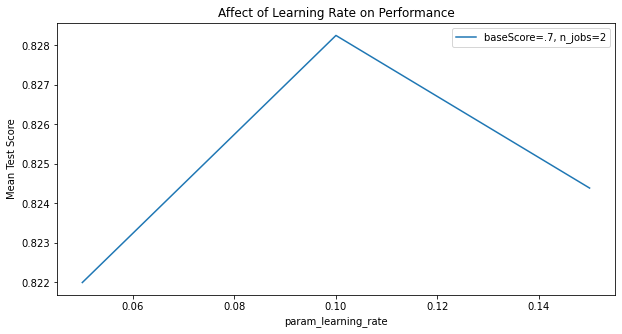

In [39]:
df_cv_results1.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results1.loc[(df_cv_results1['param_baseScore']==.7) & (df_cv_results1['param_njobs']==2),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='baseScore=.7, n_jobs=2', ax=ax)
plt.ylabel('Mean Test Score')
plt.title('Affect of Learning Rate on Performance')